In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

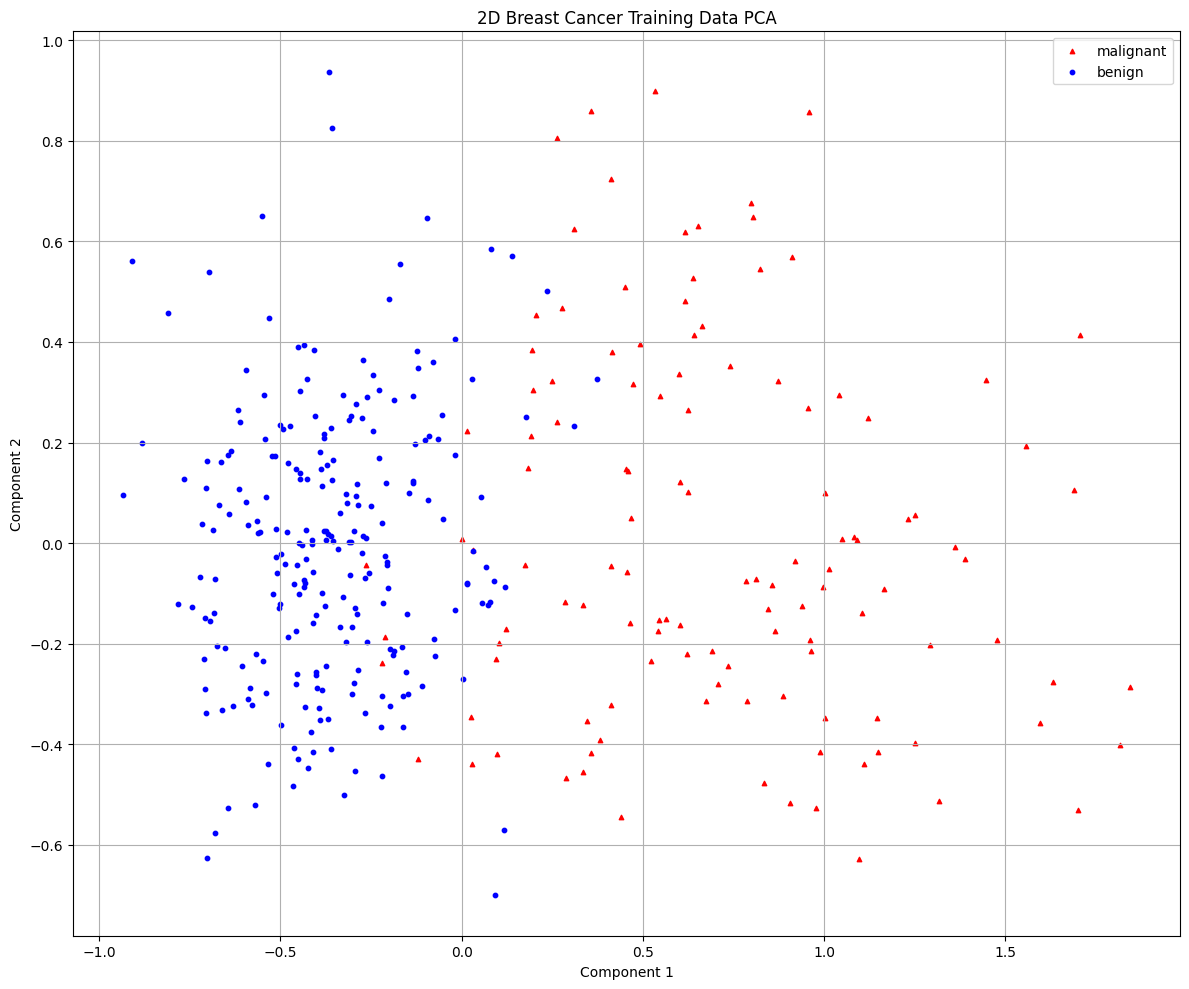

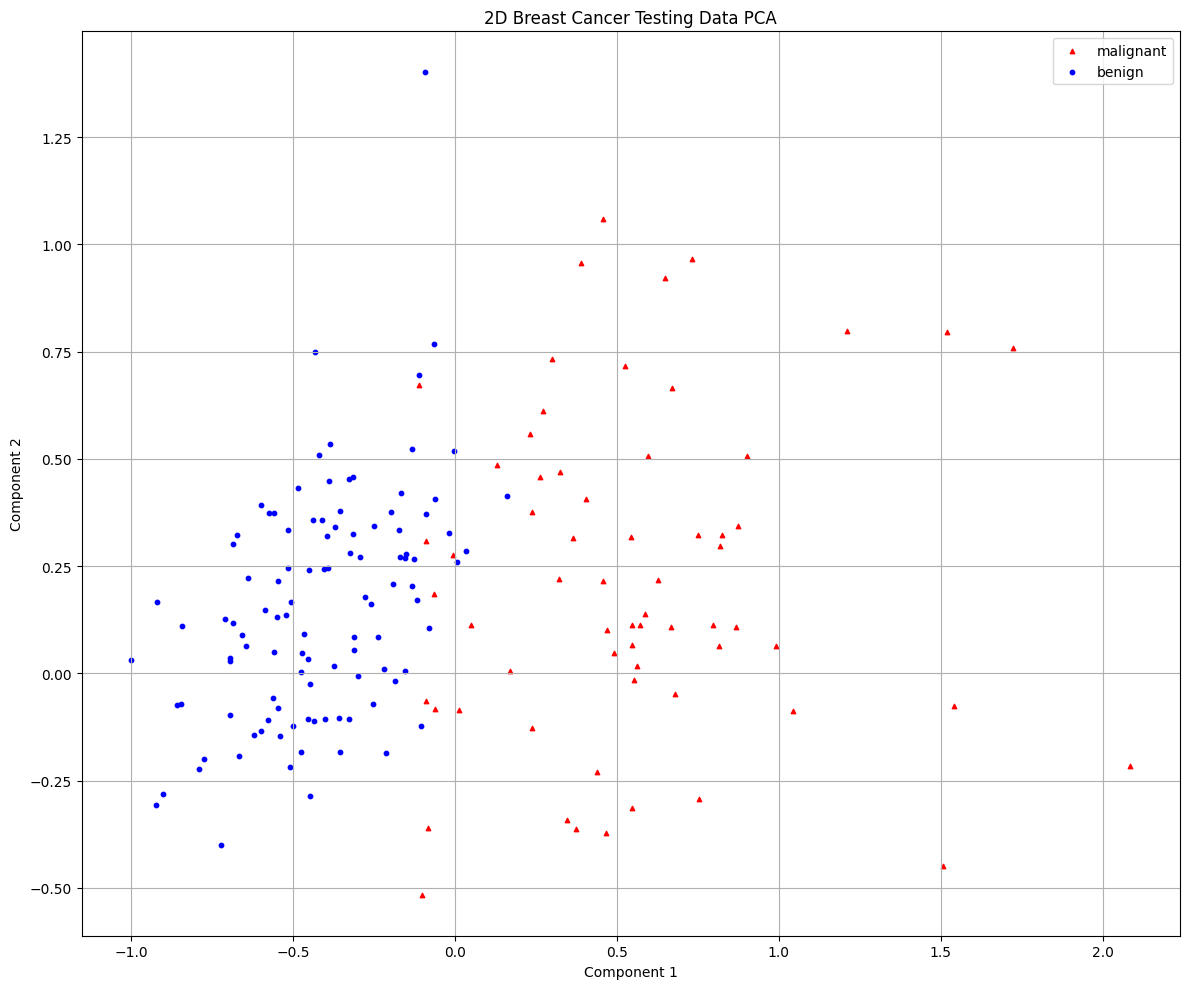

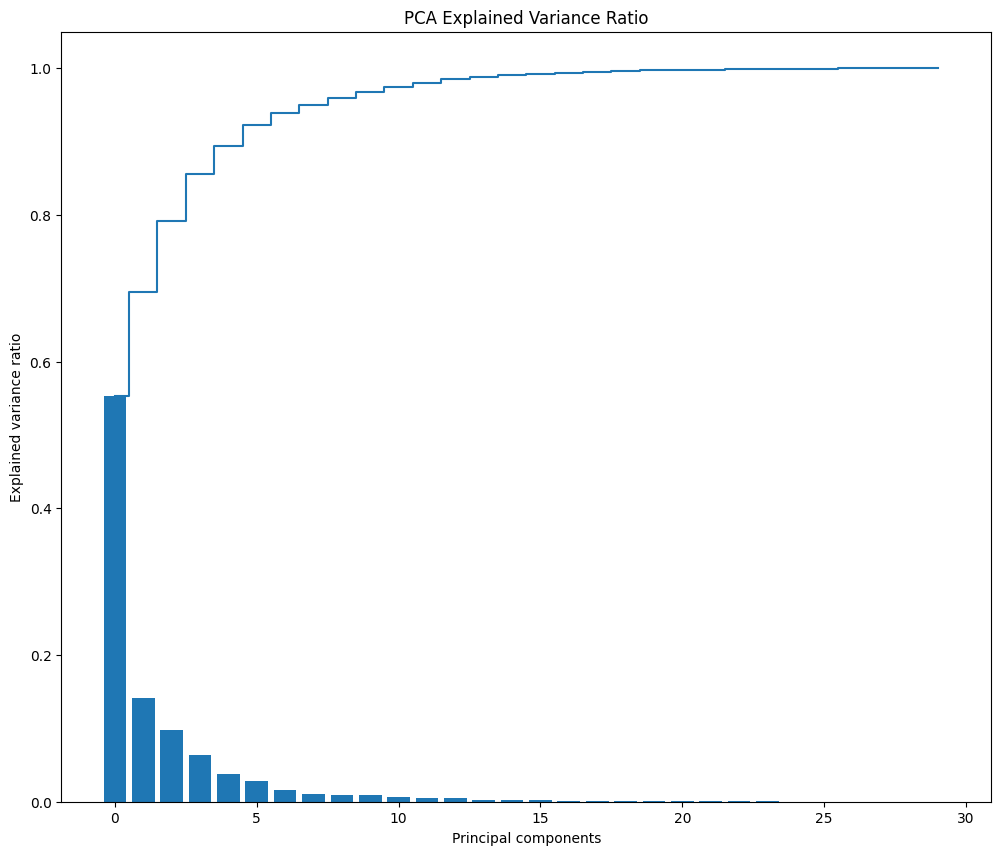

In [2]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'm', {})

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {})

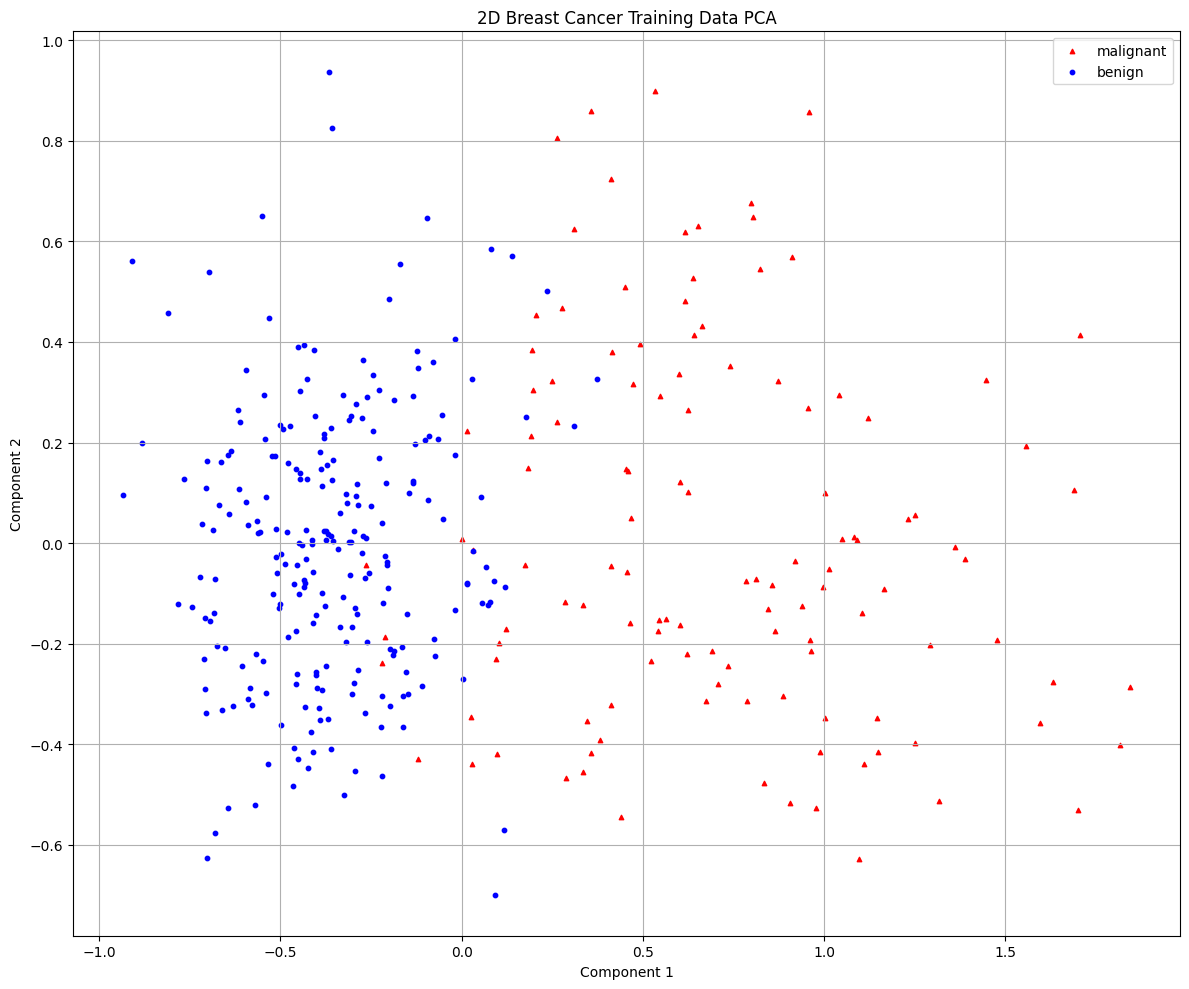

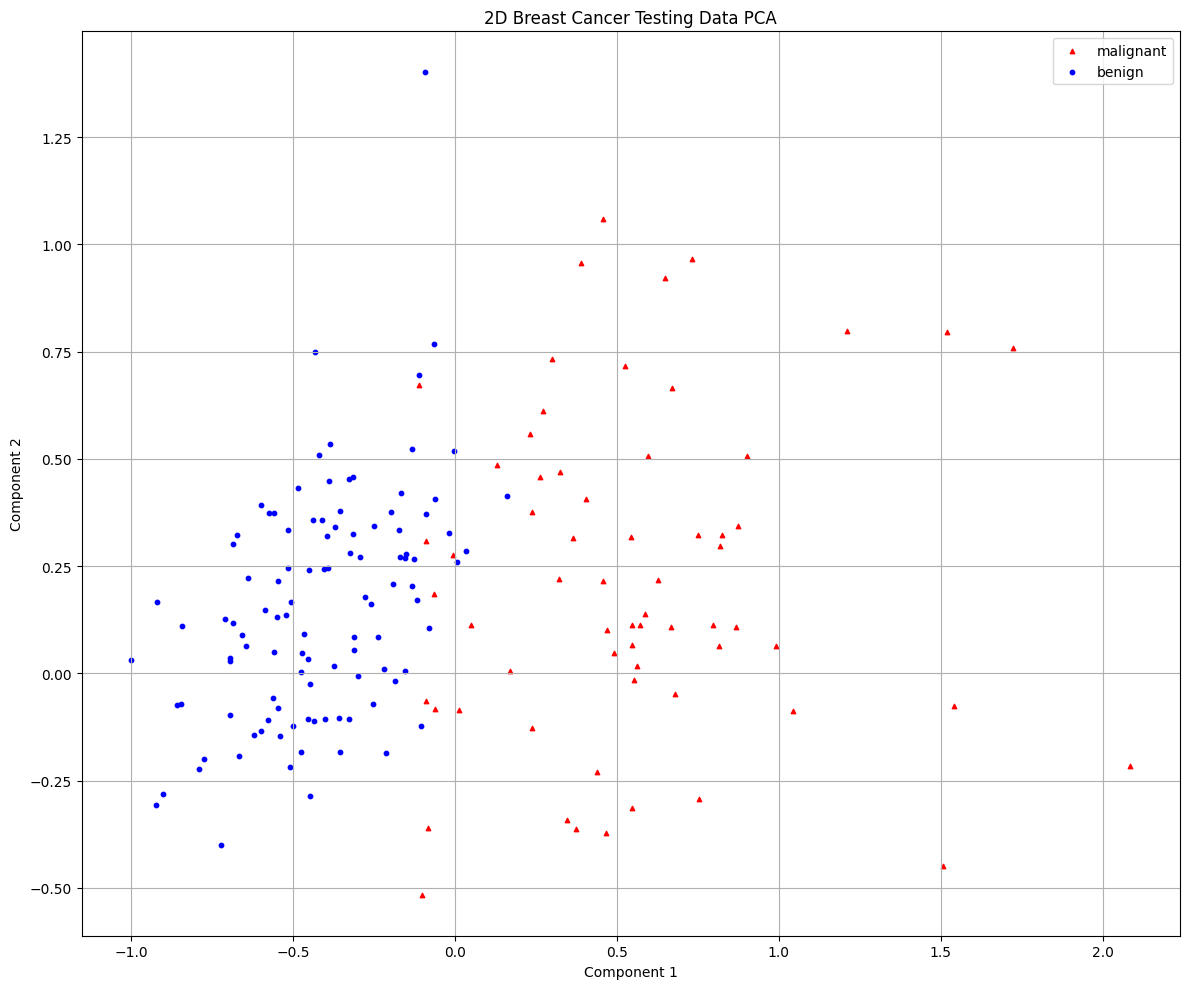

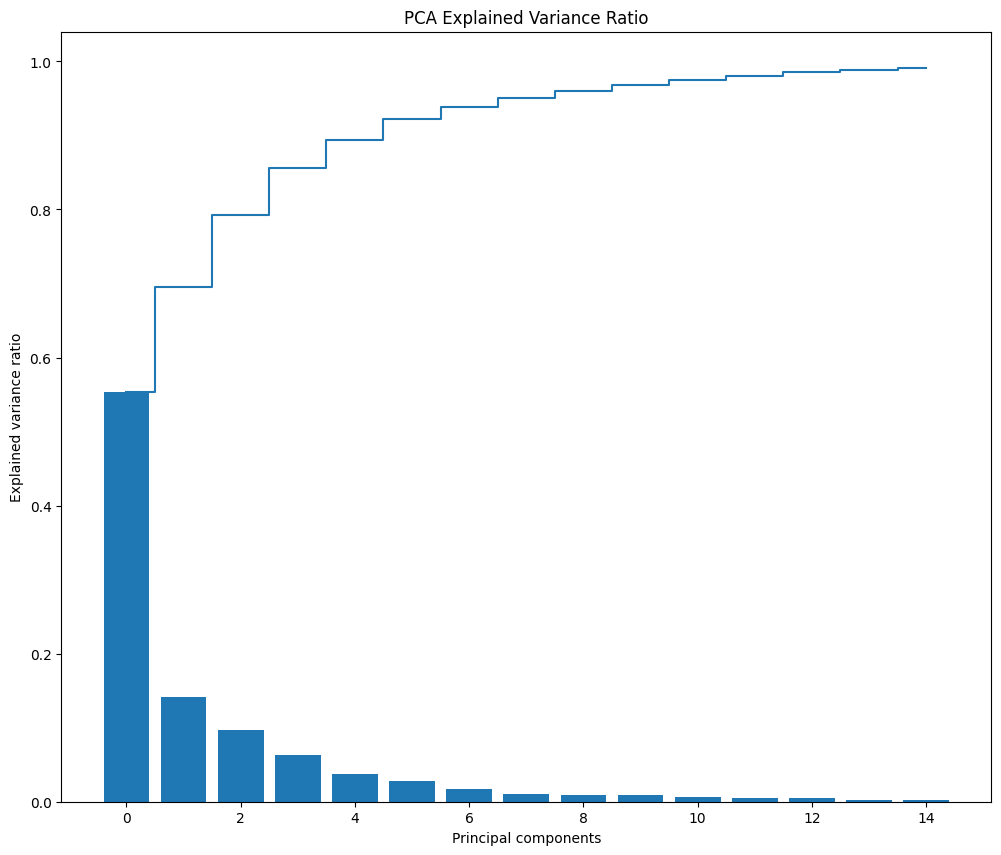

[I 2025-04-27 10:42:11,317] A new study created in memory with name: no-name-09b76ef9-f4f9-4262-8f58-99029e978de5
[I 2025-04-27 10:42:12,092] Trial 0 finished with value: 0.9558980213089804 and parameters: {'n_estimators': 179, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.9558980213089804.
[I 2025-04-27 10:42:14,046] Trial 1 finished with value: 0.9557838660578387 and parameters: {'n_estimators': 540, 'max_depth': 23, 'min_samples_split': 17, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.9558980213089804.
[I 2025-04-27 10:42:15,083] Trial 2 finished with value: 0.9585616438356164 and parameters: {'n_estimators': 240, 'max_depth': 16, 'min_samples_split': 12, 'min_samples_leaf': 7}. Best is trial 2 with value: 0.9585616438356164.
[I 2025-04-27 10:42:16,646] Trial 3 finished with value: 0.9558980213089802 and parameters: {'n_estimators': 408, 'max_depth': 26, 'min_samples_split': 17, 'min_samples_leaf': 10}. Best is trial 2 with

Best trial:
Accuracy: 0.9614155251141552
Best hyperparameters:  {'n_estimators': 838, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 16}


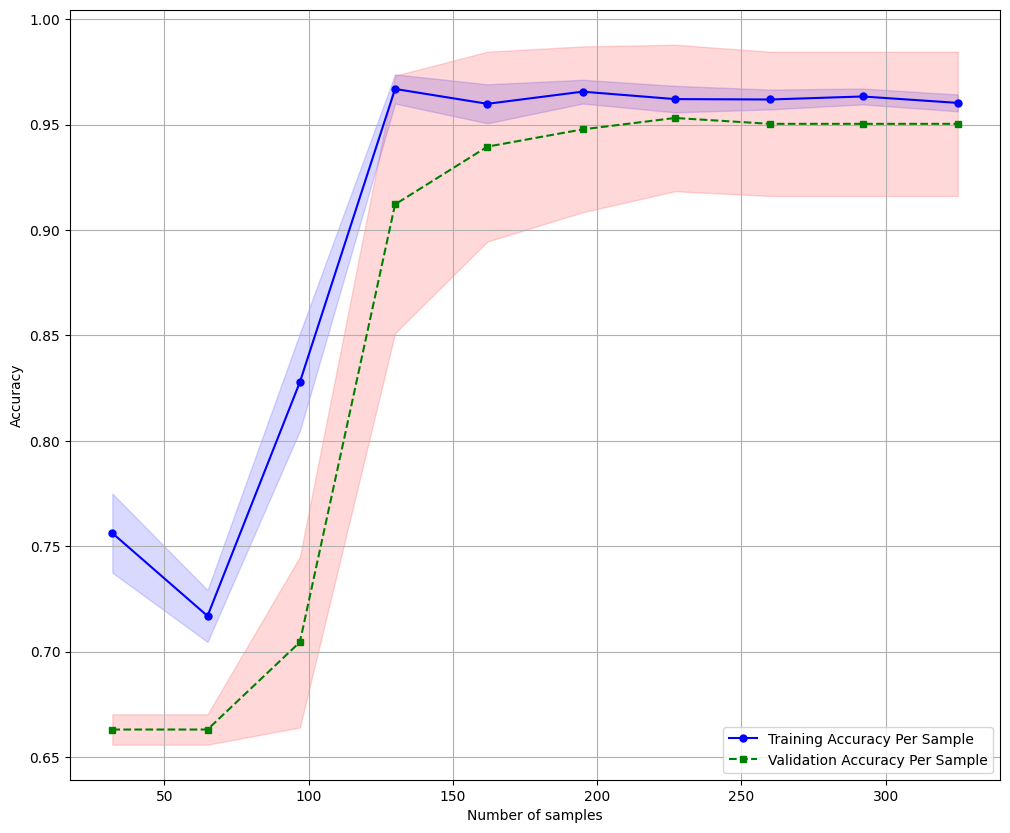

Confusion Matrix
[[ 54  10]
 [  1 106]]
Accuracy: 0.9357, Precision: 0.9138, Recall: 0.9907, F1: 0.9507, AUC: 0.9787


In [3]:
X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {'n_components': 15})
helper.train_and_evaluate_model('rf', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)